In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [6]:
def rotation_matrix(n, theta):
    """
    Compute the Rodrigues rotation matrix for a given axis n and angle theta.

    Parameters:
        n (ndarray): rotaion axis (normalized).
        theta (float): rotation angle in radian.

    Returns:
        - (ndarray) -- 3x3 rotation matrix.
    """
    K = np.array([[0.0, -n[2], n[1]], [n[2], 0.0, -n[0]], [-n[1], n[0], 0.0]])
    I = np.eye(3)
    R = I + np.sin(theta) * K + (1.0 - np.cos(theta)) * np.dot(K, K)
    return R


def create_shift_tensor(ks, Rs):
    """
    Create shift tensors for all sites.

    Args:
        ks (list): components of K, (Kxx, Kyy, Kzz, Kyz, Kzx, Kxy).
        Rs (list): symmetry operations for each site.

    Returns:
        - (list) -- shift tensors in each site.
    """
    k1, k2, k3, k4, k5, k6 = ks
    K = [[k1,k6,k5],[k6,k2,k4],[k5,k4,k3]]
    Ks = [R @ K @ R.T for R in Rs]
    return Ks


def nmr_shift(Ks, h):
    """
    Compute the NMR shift without the contributions from the quadrupolar interactions.

    Args:
        Ks (list): list of 3x3 shift tensors.
        h (ndarray): magnetic field.

    Returns:
        - (list) -- NMR shift for each K.
    """
    shift = [np.diag(h @ K @ h.T) for K in Ks]
    return shift


def compute_shift(n, s, ks, Rs):
    """
    Compute angle dependence of NMR shift.

    Args:
        n (list): rotation axis.
        s (list): starting vector.
        ks (list): components of K, (Kxx, Kyy, Kzz, Kyz, Kzx, Kxy).
        Rs (list): symmetry operations for each site.

    Returns:
        - (ndarray) -- angles.
        - (list) -- angle dependence of NMR shift around n axis.
        - (list) -- angle dependence of NMR shift around nxs axis.
    """
    theta = np.radians(range(91))

    n = np.array(n)
    n1 = n / np.linalg.norm(n)
    s = np.array(s)
    s = s / np.linalg.norm(s)
    n2 = np.cross(n1, s)
    n3 = (n1 + n2) / np.sqrt(2)
    h1 = np.array([rotation_matrix(n1, t) @ s for t in theta])
    h2 = np.array([rotation_matrix(n2, t) @ s for t in theta])
    h3 = np.array([rotation_matrix(n3, t) @ s for t in theta])

    Ks = create_shift_tensor(ks, Rs)

    shift1 = nmr_shift(Ks, h1)
    shift2 = nmr_shift(Ks, h2)
    shift3 = nmr_shift(Ks, h3)

    return theta, shift1, shift2, shift3


def plot_data(theta, shift1, shift2, shift3):
    """
    Plot angle dependences.

    Args:
        theta (ndarray): angles.
        shift1 (list): angle dependence of NMR shift around n axis.
        shift2 (list): angle dependence of NMR shift around nxs axis.
    """
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
    axes.set_title("Knight shift of Te")
    axes.set_xlabel("Rotation angle [deg.]", fontsize=15)
    axes.set_ylabel(r"Knight shift [$\times {10}^4$]", fontsize=15)

    axes.set_xlim([0, 90])
    axes.grid()

    n_site = len(shift1)
    colors = ["blue", "green", "red"]
    theta = theta * 180/np.pi
    for site in range(n_site):
        axes.plot(theta, shift1[site]*10000, "-", color=colors[site], label=f'$K_{site+1}$')
    for site in range(n_site):
        axes.plot(theta, shift2[site]*10000, "--", color=colors[site], label=f'$K_{site+1}$')
    for site in range(n_site):
        axes.plot(theta, shift3[site]*10000, ":", color=colors[site], label=f'$K_{site+1}$')
    axes.legend()

    plt.autoscale(enable=True, axis='y')
    plt.show()

def output_shift_values(theta, shift1, shift2, shift3):
    """
    Output angle and shift values in the specified format.
    """
    for j in range(3):
        print(f"Angle,Shift1[{j+1}] value")  # jの値を表示する
        for i in range(0, 91):
            print(f"{i},{shift1[j][i]*10000}")
    for j in range(3):
        print(f"Angle,Shift2[{j+1}] value")  # jの値を表示する
        for i in range(0, 91):
            print(f"{i},{shift2[j][i]*10000}")
    for j in range(3):
        print(f"Angle,Shift3[{j+1}] value")  # jの値を表示する
        for i in range(0, 91):
            print(f"{i},{shift3[j][i]*10000}")

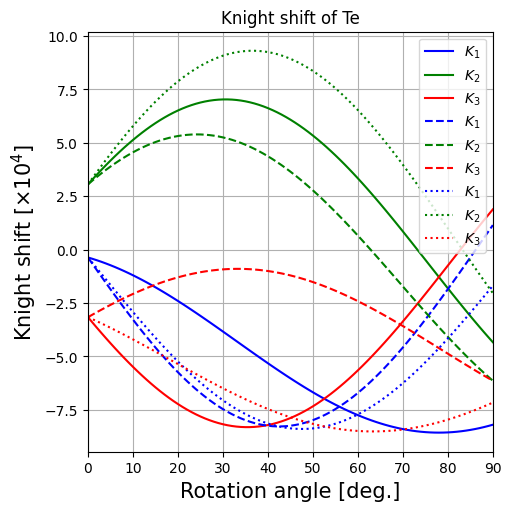

Angle,Shift1[1] value
0,-0.37054416854381256
1,-0.4337687175617703
2,-0.5016866170066393
3,-0.5742151193798961
4,-0.6512658598735582
5,-0.7327449640290914
6,-0.8185531621089753
7,-0.9085859100415896
8,-1.0027335167920604
9,-1.1008812780038884
10,-1.202909615748541
11,-1.3086942242127377
12,-1.4181062211459343
13,-1.5310123048834925
14,-1.647274916754229
15,-1.7667524086744602
16,-1.8892992157243795
17,-2.0147660334964845
18,-2.1430000000000002
19,-2.2738448818996724
20,-2.4071412648620147
21,-2.5427267477771207
22,-2.6804361406194013
23,-2.820101665706185
24,-2.9615531621089755
25,-3.1046182929683415
26,-3.2491227554598257
27,-3.3948904931550845
28,-3.5417439105195374
29,-3.689504089285161
30,-3.8379910064348373
31,-3.9870237535326787
32,-4.136420757133081
33,-4.2860000000000005
34,-4.435579242866922
35,-4.5849762464673205
36,-4.734008993565164
37,-4.882495910714841
38,-5.030256089480464
39,-5.177109506844918
40,-5.322877244540175
41,-5.467381707031658
42,-5.6104468378910255
43,-5.7518

In [7]:
# In the case of Te. (Te1 is on y-bond).
ks = [-8.572e-4, 1.146e-4, 0.0, 8.830e-4, 0.0, 0.0]

E = np.eye(3)
C3 = rotation_matrix([0,0,1], 2.0*np.pi/3.0) # for Te2.
C3i = C3.T # for Te3.

Rs = [E, C3i, C3]

n = [0, 1, 0]
s = [0.20791169081775934, 0, 0.9781476007338057]
theta, shift1, shift2, shift3 = compute_shift(n, s, ks, Rs)
plot_data(theta, shift1, shift2, shift3)

# 指定フォーマットで出力
output_shift_values(theta, shift1, shift2, shift3)

In [8]:

def save_to_csv(filename, angles, shifts, index):
    """
    Save the angles and shifts to a CSV file.

    Args:
        filename (str): Output CSV file name.
        angles (ndarray): Array of angles.
        shifts (list): Shift values for one site.
        index (int): Site index (1-based).
    """
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Header
        writer.writerow(["x", "y"])
        # Data
        for angle, shift in zip(angles, shifts):
            writer.writerow([angle, shift])

def output_shift_to_csv(theta, shift1, shift2, shift3):
    """
    Output angle and shift values to CSV files.

    Args:
        theta (ndarray): Array of angles.
        shift1 (list): Shift values for each site around n axis.
        shift2 (list): Shift values for each site around nxs axis.
    """
    # Convert angles to degrees
    angles = np.round(theta * 180 / np.pi).astype(int)  # 四捨五入で整数化
    
    # Save Shift1 data
    for i, shifts in enumerate(shift1, start=1):
        filename = f"sample({i}).csv"
        save_to_csv(filename, angles, shifts * 10000, i)
    
    # Save Shift2 data
    for i, shifts in enumerate(shift2, start=1):
        filename = f"sample{i}.csv"
        save_to_csv(filename, angles, shifts * 10000, i)
    
    # Save Shift3 data
    for i, shifts in enumerate(shift3, start=1):
        filename = f"sample{i}{i}.csv"
        save_to_csv(filename, angles, shifts * 10000, i)

# 実行例
output_shift_to_csv(theta, shift1, shift2, shift3)